## Data Mining Task 1: Data Preprocessing and Exploration
 - Dataset: Iris (from sklearn.datasets)
 - Features: sepal length, sepal width, petal length, petal width, class (species)

### Load Data

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")  # Clean output for submission

# Set random seed for reproducibility
np.random.seed(42)

# ==================== 1. LOAD DATASET ====================
print("🚀 Loading Iris dataset...")

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target  # Add target as 'species'
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})  # Map to species names

print(f"✅ Dataset loaded with {df.shape[0]} samples and {df.shape[1]} columns.")
print("\nFirst 5 rows:")
print(df.head())

🚀 Loading Iris dataset...
✅ Dataset loaded with 150 samples and 5 columns.

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


### Preprocessing

In [4]:
# ==================== 2. PREPROCESSING ====================

# --- Handle Missing Values ---
print("\n🔍 Checking for missing values...")
missing = df.isnull().sum()
print(missing)
if missing.sum() == 0:
    print("✅ No missing values detected.")
else:
    print("❌ Missing values found! Imputing with median...")
    df.fillna(df.median(numeric_only=True), inplace=True)

# --- Normalize Features (Min-Max Scaling) ---
print("\n📊 Normalizing features using Min-Max scaling...")
scaler = MinMaxScaler()
feature_columns = iris.feature_names
df[feature_columns] = scaler.fit_transform(df[feature_columns])
print("✅ Feature scaling complete. Scaled range: [0, 1]")
print("\nScaled feature ranges:")
print(df[feature_columns].describe().loc[['min', 'max']])

# --- Encode Class Label (One-Hot Encoding) ---
print("\n🏷️  One-hot encoding species labels...")
df_encoded = pd.get_dummies(df, columns=['species'], prefix='species')
print("✅ One-hot encoding applied.")
print("Encoded columns:", list(df_encoded.columns))


🔍 Checking for missing values...
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64
✅ No missing values detected.

📊 Normalizing features using Min-Max scaling...
✅ Feature scaling complete. Scaled range: [0, 1]

Scaled feature ranges:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
min                0.0               0.0                0.0               0.0
max                1.0               1.0                1.0               1.0

🏷️  One-hot encoding species labels...
✅ One-hot encoding applied.
Encoded columns: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species_setosa', 'species_versicolor', 'species_virginica']


### Exploration


📈 Summary Statistics (after scaling):
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            0.428704          0.440556           0.467458   
std             0.230018          0.181611           0.299203   
min             0.000000          0.000000           0.000000   
25%             0.222222          0.333333           0.101695   
50%             0.416667          0.416667           0.567797   
75%             0.583333          0.541667           0.694915   
max             1.000000          1.000000           1.000000   

       petal width (cm)  
count        150.000000  
mean           0.458056  
std            0.317599  
min            0.000000  
25%            0.083333  
50%            0.500000  
75%            0.708333  
max            1.000000  

🖼️ Generating pairplot...


<Figure size 1000x800 with 0 Axes>

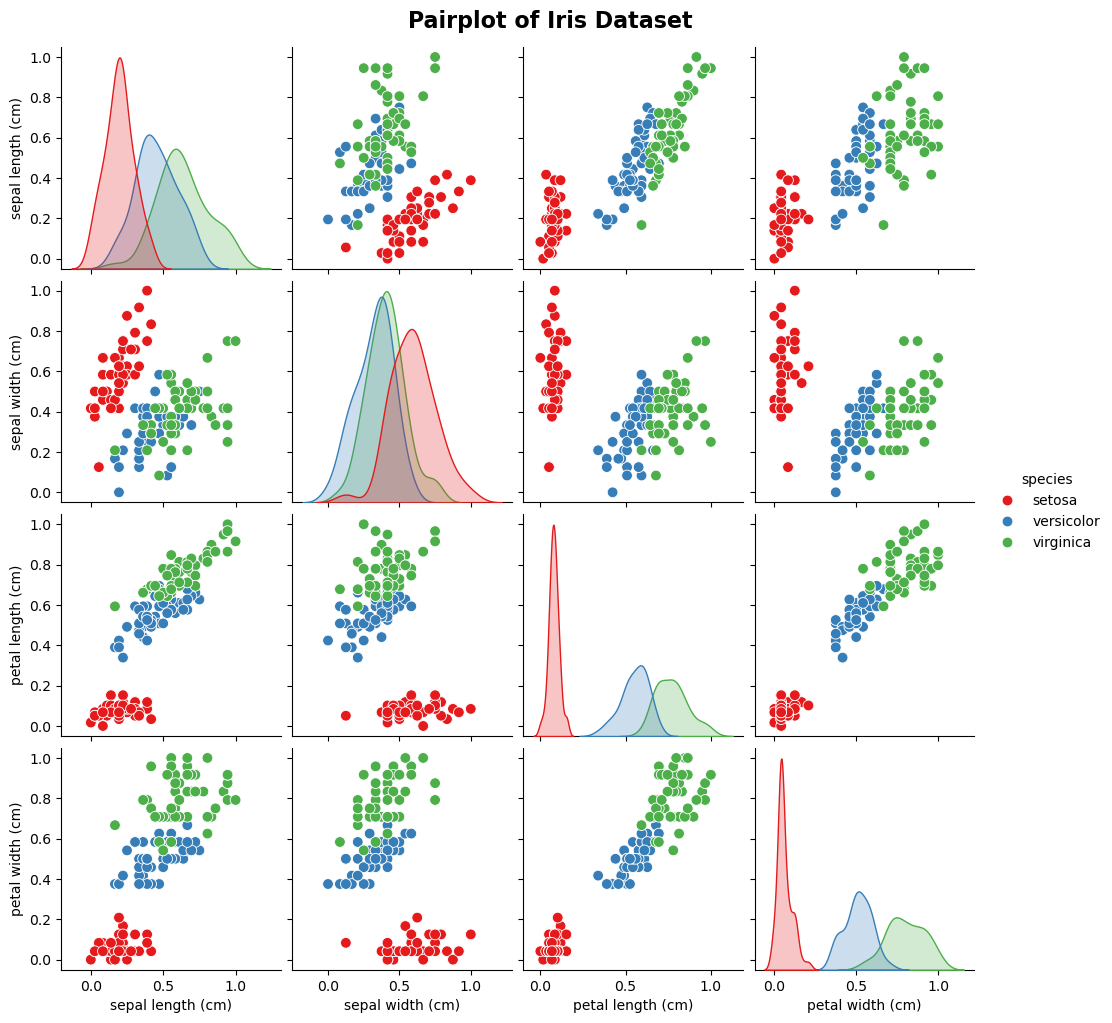


🖼️ Generating correlation heatmap...


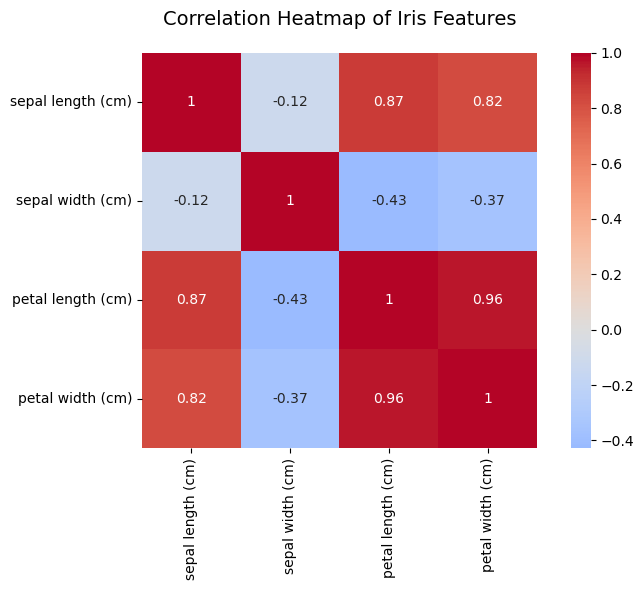


🖼️ Generating boxplots for outlier detection...


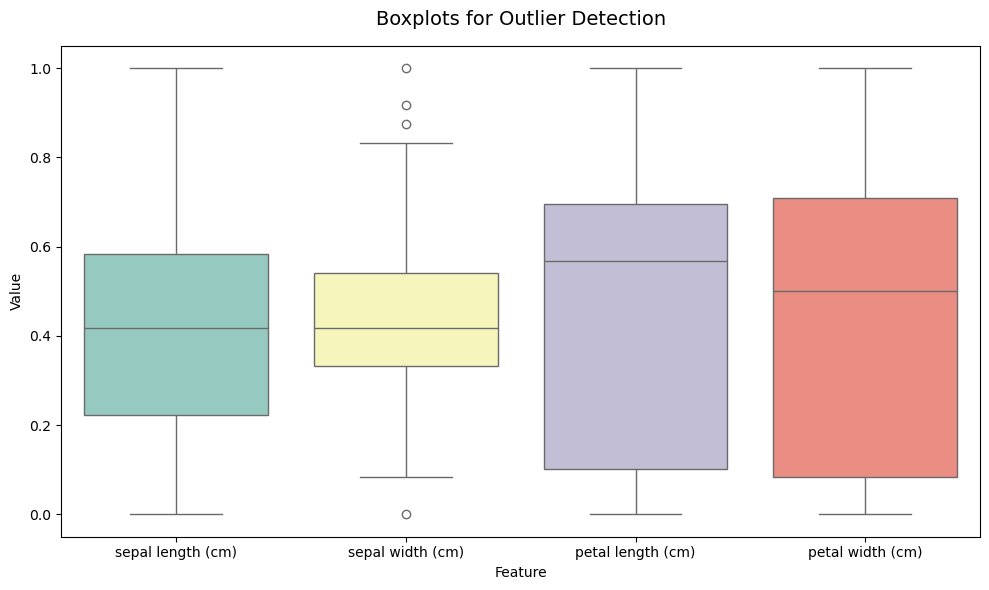

In [6]:
# ==================== 3. EXPLORATION ====================

# --- Summary Statistics ---
print("\n📈 Summary Statistics (after scaling):")
summary = df[feature_columns + ['species']].describe()
print(summary)

# Save summary to CSV (optional for submission)
summary.to_csv("iris_summary_stats.csv")

# --- Pairplot ---
print("\n🖼️ Generating pairplot...")
plt.figure(figsize=(10, 8))
sns.pairplot(df, hue='species', palette='Set1', plot_kws={'s': 60})
plt.suptitle("Pairplot of Iris Dataset", y=1.02, fontsize=16, weight='bold')
plt.savefig("iris_pairplot.png", dpi=300, bbox_inches='tight')
plt.show()

# --- Correlation Heatmap ---
print("\n🖼️ Generating correlation heatmap...")
plt.figure(figsize=(8, 6))
correlation = df[feature_columns].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, square=True,
            xticklabels=feature_columns, yticklabels=feature_columns)
plt.title("Correlation Heatmap of Iris Features", fontsize=14, pad=20)
plt.tight_layout()
plt.savefig("iris_correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

# --- Boxplots for Outliers ---
print("\n🖼️ Generating boxplots for outlier detection...")
plt.figure(figsize=(10, 6))
df_melted = df.melt(id_vars='species', value_vars=feature_columns, var_name='Feature', value_name='Value')
sns.boxplot(data=df_melted, x='Feature', y='Value', palette='Set3')
plt.title("Boxplots for Outlier Detection", fontsize=14, pad=15)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("iris_boxplots.png", dpi=300, bbox_inches='tight')
plt.show()

### Split Data

In [8]:
# ==================== 4. TRAIN/TEST SPLIT FUNCTION ====================

def split_data(df, target_col, test_size=0.2, random_state=42):
    """
    Splits data into train and test sets (80/20 by default).
    Returns: X_train, X_test, y_train, y_test
    """
    print(f"\n✂️  Splitting data into {int((1-test_size)*100)}/{int(test_size*100)} train/test...")
    X = df.drop(columns=[target_col])
    y = df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=df[target_col]
    )
    print(f"✅ Split complete. Train: {len(X_train)}, Test: {len(X_test)}")
    return X_train, X_test, y_train, y_test

# Apply split
X_train, X_test, y_train, y_test = split_data(df_encoded, 'species_setosa')  # Any encoded species can be target

# Optional: Save preprocessed data
df.to_csv("iris_preprocessed.csv", index=False)
df_encoded.to_csv("iris_encoded.csv", index=False)

print("\n🎉 Data preprocessing and exploration completed!")
print("📁 Files generated:")
print("  - iris_preprocessed.csv")
print("  - iris_encoded.csv")
print("  - iris_summary_stats.csv")
print("  - iris_pairplot.png")
print("  - iris_correlation_heatmap.png")
print("  - iris_boxplots.png")


✂️  Splitting data into 80/20 train/test...
✅ Split complete. Train: 120, Test: 30

🎉 Data preprocessing and exploration completed!
📁 Files generated:
  - iris_preprocessed.csv
  - iris_encoded.csv
  - iris_summary_stats.csv
  - iris_pairplot.png
  - iris_correlation_heatmap.png
  - iris_boxplots.png
